# Christmas Movies And Its Cranks

It is November in the year 2024 and is that time when the Christmas movie industry starts releasing new films. The industry is highly profitable and immensely popular, especially in the US, during the final months leading up to Christmas. The universal themes of love, family, generosity, and hope resonate deeply, making Christmas movies a beloved tradition for many — including myself. Watching these films is one of my favorite seasonal pastimes, and I proudly count myself among the industry's most enthusiastic supporters.

<div style="text-align: center;"> 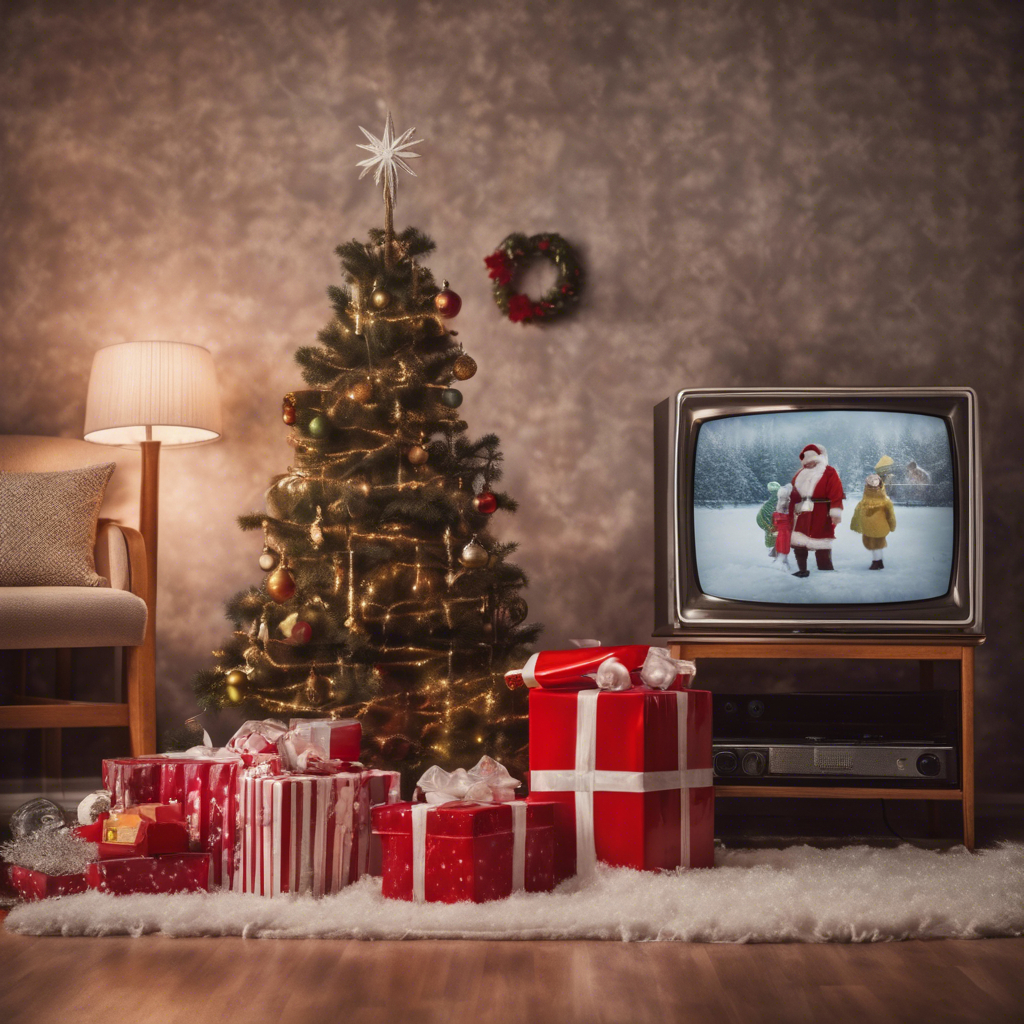 "</div>

This project investigates the trends that contribute to the success and popularity of Christmas movies. By examining release patterns, distribution channels, genre diversity, critical reception, and movie lengths, this analysis aims to identify key elements that may enhance a movie’s appeal to both audiences and critics. The analysis will address these questions: 
* How has the number of Christmas movies released each year changed over time?
* What is the distribution of Christmas movie releases between theatrical and TV/streaming platforms?
* Which genres are most popular among Christmas movies?
* What are the common rating categories for Christmas movies?
* Which Christmas movies have the highest IMDB ratings, meta scores, and vote counts, and is there a statistically significant relationship between these metrics?
* How do the ratings vary over time? Is there a correlation between the time of release and ratings?
* Is there a correlation between the movie's length and ratings? 


## Data Sources

The data comes from the [Christmas Movies](https://www.kaggle.com/datasets/jonbown/christmas-movies) dataset on Kaggle . The dataset includes all movies/episodes that are tagged as a 'Christmas Movie' on IMDB (Internet Movie Database) as of December 2023. While it provides a broad collection, it does not capture every Christmas movie/episode, and some entries may be considered loosely associated with the holiday.

| Column | Description |
| -------- | ------- |
| Rating | MPAA Rating: PG, PG-13, etc |
| Runtime | Runtime of movie/episode in minutes |
| IMDB Rating | Overall rating from IMDB |
| Meta Score | Metacritic score |
| Genre | One or more categories |
| Release Year| Year the movie/episode was released |
| Description | Synopsis |
| Director | Person who directed the movie/episode |	
| Stars | List of key actors |
| Votes	| Number of IMDB Votes |
| Gross	| Theatrical performance (if available) |
| Image Source | Movie poster URL |oster URL |20 |

## Import Modules

First, we will import all the python modules/libraries needed for this project.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import spearmanr

## Data Exploration and Preparation

### Load Data

We load the data into the `DataFrame` so that the data can be investigated and visualized.

The name of the DataFrame will be `xmas_movies` and we will take a look at the first five records of the DataFrame and then perform the intial exploration of the data.

In [16]:
#Load Data into DataFrame
xmas_movies = pd.read_csv("christmas_movies.csv")
#View first 5 records
xmas_movies.head()

,title,rating,runtime,imdb_rating,meta_score,genre,release_year,description,director,stars,votes,gross,img_src,type
0,Love Actually,R,135.0,7.6,55.0,"Comedy, Drama, Romance",2003.0,Follows the lives of eight very different coup...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...","517,283",$59.70M,https://m.media-amazon.com/images/M/MV5BNThkNj...,Movie
1,Home Alone,PG,103.0,7.7,63.0,"Comedy, Family",1990.0,"An eight-year-old troublemaker, mistakenly lef...",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...","629,713",$285.76M,https://m.media-amazon.com/images/M/MV5BMzFkM2...,Movie
2,National Lampoon's Christmas Vacation,PG-13,97.0,7.5,49.0,Comedy,1989.0,The Griswold family's plans for a big family C...,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...","213,196",$71.32M,https://m.media-amazon.com/images/M/MV5BMGZkMW...,Movie
3,Elf,PG,97.0,7.1,66.0,"Adventure, Comedy, Family",2003.0,"Raised as an oversized elf, Buddy travels from...",Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...","300,546",$173.40M,https://m.media-amazon.com/images/M/MV5BMzUxNz...,Movie
4,How the Grinch Stole Christmas,PG,104.0,6.3,46.0,"Comedy, Family, Fantasy",2000.0,"On the outskirts of Whoville lives a green, re...",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...","280,898",$260.04M,https://m.media-amazon.com/images/M/MV5BNWNiNT...,Movie


### Initial Exploration

The data has **873 rows** and **14 columns**. After intial review of the information in each column, here are some of the observations that were made:
* If `imdb_rating` is null, the `votes` are also null. However, we will convert the votes from strings to floats for better analysis.
* Christmas episodes will not be included in the analysis, so we will remove these records from the DataFrame.
* Additionally, although `runtime`, `release_year`, and `votes` are inherently integer values, they will be left as floats for the analysis. This approach ensures that null values can be preserved, as converting them to integers would require filling nulls with 0, which could potentially skew the results.

In [19]:
#Rows and Columns
xmas_movies.shape

(873, 14)

In [20]:
#Info on survey headers
xmas_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         873 non-null    object 
 1   rating        660 non-null    object 
 2   runtime       832 non-null    float64
 3   imdb_rating   839 non-null    float64
 4   meta_score    100 non-null    float64
 5   genre         872 non-null    object 
 6   release_year  862 non-null    float64
 7   description   873 non-null    object 
 8   director      868 non-null    object 
 9   stars         862 non-null    object 
 10  votes         839 non-null    object 
 11  gross         79 non-null     object 
 12  img_src       873 non-null    object 
 13  type          873 non-null    object 
dtypes: float64(4), object(10)
memory usage: 95.6+ KB


In [21]:
#null value counts for each column
xmas_movies.isna().sum()

title             0
rating          213
runtime          41
imdb_rating      34
meta_score      773
genre             1
release_year     11
description       0
director          5
stars            11
votes            34
gross           794
img_src           0
type              0
dtype: int64

In [22]:
# Want to explore why runtime in minutes is a float
xmas_movies['runtime'].unique()

array([135., 103.,  97., 104.,  85., 132., 120., 100., 130., 101., 127.,
       114.,  89.,  96.,  99.,  88., 102., 105.,  92.,  76.,  93.,  82.,
        87.,  98.,  78.,  47.,  26.,  83., 116., 107.,  86.,  48.,  84.,
       112., 113.,  91.,  95.,  51.,  25., 126., 111.,  90., 109., 122.,
        29.,  94.,  nan,  69., 115., 117., 106., 118., 125., 140., 199.,
        80.,  72., 123.,  77.,  81.,  79.,  43., 171.,  65.,  75.,  60.,
         9.,  23.,  28.,  70.,  50.,  68., 110.,  74.,  44., 128.,  71.,
         1.,  53.,  30.,  11.,  58., 108.,  55.,  22.,  17.,  13.,  49.,
         7.,  12.,   5.,   6.,  32.,   8.,   3.,  20.])

In [23]:
#want to take a look at the max and min imdb rating to make sure there are no unusual values
xmas_movies['imdb_rating'].max(), xmas_movies['imdb_rating'].min()

(9.2, 1.3)

In [24]:
#want to take a look at the max and min meta score to make sure there are no unusual values
xmas_movies['meta_score'].max(), xmas_movies['meta_score'].min()

(96.0, 18.0)

In [25]:
# Want to explore why release year is a float
xmas_movies['release_year'].unique()

array([2003., 1990., 1989., 2000., 2018., 1988., 1992., 2004., 1946.,
       1994., 1954., 2022., 1996., 2019., 2009., 2002., 1947., 2008.,
       1997., 2016., 1993., 2006., 2023., 2005., 1964., 1966., 1984.,
       2007., 1998., 2020., 1974., 1985., 2021., 2011., 1942., 1970.,
       1945., 2017., 1951., 1944., 1999., 1965., 2001., 1969., 2012.,
       1940., 1939., 1938., 2014., 2015., 1991., 1960., 1982., 1961.,
       1983., 1986., 1958., 2010., 1949., 1968., 1957., 1973., 1953.,
       2013., 1934., 1935., 1952., 1925., 1995., 1948., 1978., 1937.,
       1950., 1936., 1931., 1977.,   nan, 1898., 1981., 1941., 1928.,
       1959., 1979.])

In [26]:
#What is the movie from 1898. Verified it is a silent film from 1898.
xmas_movies[xmas_movies.release_year == 1898]

,title,rating,runtime,imdb_rating,meta_score,genre,release_year,description,director,stars,votes,gross,img_src,type
808,Santa Claus,NaN,1.0,6.4,NaN,"Short, Family, Fantasy",1898.0,Brother and sister are sent to bed on Christma...,George Albert Smith,"Laura Bayley, Dorothy Smith, Harold Smith,","1,015",NaN,https://m.media-amazon.com/images/M/MV5BMTcyZG...,Movie


In [27]:
# Unique values and counts for type
xmas_movies['type'].value_counts()

type
Movie         864
TV Episode      9
Name: count, dtype: int64

### Exploring duplicates

To ensure the dataset is free of duplicates, several checks were performed. Initially, no exact duplicate records were found. A check for duplicate movie titles was then executed, with duplicates expected due to remakes. Two records with the same title and release year were identified, but these were determined to be distinct — one being a full-length movie and the other a short film, both released in the same year. No duplicates were found based on the title and director combination or the title and stars combination.

In [30]:
#check for duplicate records
xmas_movies[xmas_movies.duplicated()==True]

,title,rating,runtime,imdb_rating,meta_score,genre,release_year,description,director,stars,votes,gross,img_src,type


In [31]:
#Check for duplicate titles
xmas_movies[xmas_movies.duplicated(subset=['title']) == True]

,title,rating,runtime,imdb_rating,meta_score,genre,release_year,description,director,stars,votes,gross,img_src,type
21,Miracle on 34th Street,Not Rated,96.0,7.9,88.0,"Comedy, Drama, Family",1947.0,After a divorced New York mother hires a nice ...,George Seaton,"Edmund Gwenn, Maureen O'Hara, John Payne, Gene...","53,189",$2.65M,https://m.media-amazon.com/images/M/MV5BNjRkOG...,Movie
38,A Christmas Carol,PG,100.0,7.8,NaN,"Drama, Family, Fantasy",1984.0,A bitter old miser who rationalizes his uncari...,Clive Donner,"George C. Scott, Frank Finlay, Angela Pleasenc...","17,502",NaN,https://m.media-amazon.com/images/M/MV5BMmRjZG...,Movie
58,A Christmas Carol,TV-PG,86.0,8.1,NaN,"Drama, Family, Fantasy",1951.0,"Ebenezer Scrooge, a curmudgeonly, miserly busi...",Brian Desmond Hurst,"Alastair Sim, Jack Warner, Kathleen Harrison, ...","24,985",NaN,https://m.media-amazon.com/images/M/MV5BZTM0MW...,Movie
65,A Christmas Carol,TV-PG,95.0,7.4,NaN,"Drama, Fantasy",1999.0,An old bitter miser who makes excuses for his ...,David Hugh Jones,"Patrick Stewart, Richard E. Grant, Joel Grey, ...","10,570",NaN,https://m.media-amazon.com/images/M/MV5BZTBmZT...,Movie
93,A Christmas Carol,Passed,69.0,7.5,72.0,"Drama, Family, Fantasy",1938.0,An elderly miser learns the error of his ways ...,Edwin L. Marin,"Reginald Owen, Gene Lockhart, Kathleen Lockhar...","8,494",NaN,https://m.media-amazon.com/images/M/MV5BMDhhMz...,Movie
97,Little Women,PG,115.0,7.3,87.0,"Drama, Family, Romance",1994.0,The March sisters live and grow in post-Civil ...,Gillian Armstrong,"Susan Sarandon, Winona Ryder, Kirsten Dunst, C...","62,422",$50.08M,https://m.media-amazon.com/images/M/MV5BNzY2M2...,Movie
144,Babes in Toyland,G,140.0,5.2,NaN,"Adventure, Family, Fantasy",1986.0,"A young girl wakes up in the realm of Toyland,...",Clive Donner,"Drew Barrymore, Richard Mulligan, Eileen Brenn...","3,886",NaN,https://m.media-amazon.com/images/M/MV5BMTk1Mj...,Movie
242,Scrooge,PG,78.0,6.4,NaN,"Drama, Family, Fantasy",1935.0,Ebenezer Scrooge is a mean old miser who wants...,Henry Edwards,"Seymour Hicks, Donald Calthrop, Robert Cochran...","2,553",NaN,https://m.media-amazon.com/images/M/MV5BNmQ3Mz...,Movie
243,A Christmas Wish,TV-PG,90.0,6.3,NaN,"Comedy, Drama, Family",2019.0,Maddie slips in a wish that her sister Faith w...,Emily Moss Wilson,"Hilarie Burton, Tyler Hilton, Megan Park, Lee ...","1,081",NaN,https://m.media-amazon.com/images/M/MV5BNmMwZD...,Movie
289,Little Women,Approved,122.0,7.2,61.0,"Drama, Family, Romance",1949.0,The four daughters of a New England family fig...,Mervyn LeRoy,"June Allyson, Peter Lawford, Margaret O'Brien,...","8,101",$7.47M,https://m.media-amazon.com/images/M/MV5BMzg3Yj...,Movie


In [32]:
#Checking for duplicates with the same title and release year
movies_duplicate = xmas_movies[xmas_movies.duplicated(subset=['title','release_year']) == True]
pd.set_option('display.max_rows', None)
xmas_movies.merge(movies_duplicate, on = ['title'], how = 'right')

,title,rating_x,runtime_x,imdb_rating_x,meta_score_x,genre_x,release_year_x,description_x,director_x,stars_x,...,meta_score_y,genre_y,release_year_y,description_y,director_y,stars_y,votes_y,gross_y,img_src_y,type_y
0,Christmas List,TV-G,84.0,6.2,NaN,"Comedy, Romance",2016.0,Isobel plans a storybook Christmas with her bo...,Paul A. Kaufman,"Alicia Witt, Gabriel Hogan, Peter Benson, Wand...",...,NaN,"Short, Drama",2016.0,Add a Plot,Rhys Parsons,"Elliott Hall, Blayne Welsh,",NaN,NaN,https://m.media-amazon.com/images/M/MV5BMWJhZD...,Movie
1,Christmas List,NaN,5.0,NaN,NaN,"Short, Drama",2016.0,Add a Plot,Rhys Parsons,"Elliott Hall, Blayne Welsh,",...,NaN,"Short, Drama",2016.0,Add a Plot,Rhys Parsons,"Elliott Hall, Blayne Welsh,",NaN,NaN,https://m.media-amazon.com/images/M/MV5BMWJhZD...,Movie


In [33]:
#Checking for duplicates with the same title and director
movies_duplicate = xmas_movies[xmas_movies.duplicated(subset=['title','director']) == True]
pd.set_option('display.max_rows', None)
xmas_movies.merge(movies_duplicate, on = ['title'], how = 'right')

,title,rating_x,runtime_x,imdb_rating_x,meta_score_x,genre_x,release_year_x,description_x,director_x,stars_x,...,meta_score_y,genre_y,release_year_y,description_y,director_y,stars_y,votes_y,gross_y,img_src_y,type_y


In [34]:
#Checking for duplicates with the same title and stars
movies_duplicate = xmas_movies[xmas_movies.duplicated(subset=['title','stars']) == True]
pd.set_option('display.max_rows', None)
xmas_movies.merge(movies_duplicate, on = ['title'], how = 'right')

,title,rating_x,runtime_x,imdb_rating_x,meta_score_x,genre_x,release_year_x,description_x,director_x,stars_x,...,meta_score_y,genre_y,release_year_y,description_y,director_y,stars_y,votes_y,gross_y,img_src_y,type_y


### Movie Ratings

Movies are usually assigned a rating based on their suitability for different audiences. Here are the ratings in this dataset, along with the description:
* **TV-G** and **G** (General Audience): These movies are suitable for all ages. This rating implies a family-friendly film that younger children can enjoy without parental reservations.
* **TV-PG** and **PG** (Parental Guidance Suggested): These films are generally appropriate for children but may contain some material that parents might find unsuitable for younger children.
* **TV-14** and **PG-13** (Parents Strongly Cautioned): Movies with these ratings may contain content unsuitable for children under 13/14. These movies could have strong language, intense violence, or sexual content.
* **TV-Y** (All Children): These movies are appropriate for children of all ages, including very young children (ages 2-6). These films are designed to be gentle and educational, with content that young children can understand and enjoy without potentially disturbing themes.
* **R** (Restricted): R-rated movies contain adult material such as adult activity, strong language, intense or persistent violence, sexually-oriented nudity, drug abuse, or other elements that parents would find inappropriate for children under 17 without parental guidance.
* **TV-MA**(Mature Audience Only): Movies are specifically designed for mature audiences and are unsuitable for viewers under 17. These films contain explicit sexual content, strong profanity, or graphic violence. Compared to R-rated movies, this rating for television content tends to allow for slightly more explicit material.
* **Not Rated**:These movies have not undergone a formal rating process. This doesn't necessarily mean the film contains objectionable material, but it indicates the absence of a standard classification. It can also refer to content that is intended for a particular audience and does not require a rating, such as certain educational or artistic works.
* **Unrated**: This rating could mean that the content was either never submitted for a rating or is a version of a film that differs from the rated version (eg: director's cut).
* **Approved** and **Passed**: Both of these ratings are older film classifications that were used in the early days of Hollywood (1930s-1960s) to indicate that a movie met the moral and content standards of the time.

In [37]:
#What are the distinct ratings?
xmas_movies['rating'].unique()

array(['R', 'PG', 'PG-13', 'G', 'Not Rated', nan, 'TV-PG', 'TV-G',
       'TV-MA', 'Passed', 'Approved', 'TV-14', 'Unrated', 'TV-Y'],
      dtype=object)

### Data Preparation

We will now the prepare the data for analysis.

**First**, we will convert the `votes` from strings to floats by removing the commas and changing the data type to float.

In [40]:
xmas_movies['votes'] = xmas_movies['votes'].str.replace(',','').astype('float64')

In [41]:
#verify conversions
xmas_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         873 non-null    object 
 1   rating        660 non-null    object 
 2   runtime       832 non-null    float64
 3   imdb_rating   839 non-null    float64
 4   meta_score    100 non-null    float64
 5   genre         872 non-null    object 
 6   release_year  862 non-null    float64
 7   description   873 non-null    object 
 8   director      868 non-null    object 
 9   stars         862 non-null    object 
 10  votes         839 non-null    float64
 11  gross         79 non-null     object 
 12  img_src       873 non-null    object 
 13  type          873 non-null    object 
dtypes: float64(5), object(9)
memory usage: 95.6+ KB


**Lastly**, since there are only 9 TV episodes tagged as 'Christmas Movies', we will exclude them from the analysis due to the small sample size. These records will be removed from the `DataFrame`.

In [43]:
#Remove the TV Episode records
xmas_movies = xmas_movies[xmas_movies.type != 'TV Episode']

In [44]:
#Verify that TV episodes are not in the Data Frame. The number of rows should be 864.
xmas_movies.shape

(864, 14)

### Common Routines

These routines 

In [47]:
def scatter_correlation(dataset,x_col, y_col):
    # Scatter plot of  meta_score vs release_year
    sns.scatterplot(data=dataset, x=x_col, y=y_col, color='green')
    # Fit a linear regression line
    m, b = np.polyfit(dataset[x_col], dataset[y_col], 1)
    # Plot the regression line
    plt.plot(dataset[x_col], m * dataset[x_col] + b, color='red')

## Data Analysis

### Summary Statistics

#### Numeric Data

Based on the Summary Statistics for numeric data, here are some of the key observations:
* `runtime`:
  * 829 records have runtimes, with an average runtime of about 86.77 minutes and a standard deviation of 17.93 minutes.
  * The maximum runtime is 199 minutes, while the minimum is just 1 minute. This range signifies that there are full length movies and short films included in the dataset.
* `imdb_rating`:
  * There are 837 records with IMDB ratings, with an average of 6.09. The standard deviation is low at 0.96, suggesting that most movies have similar ratings.
  * The minimum rating is 1.3, and the maximum is 8.6, so the dataset includes a wide range of imdb ratings.
* `meta_score`:
  * Only 100 movies have meta scores, with an average of 57.65. This could be due to many movies (likely TV Movies) lacking enough critic reviews to generate a score. 
  * The standard deviation of 17.9 indicates a moderate spread, with meta scores ranging from 18 to 96.
* `release_year`:
  * The data spans over a century, with the earliest movie released in 1898 all the way and the most recent in 2023, the year this dataset was last updated. The average release year is 2009, with most movies released between 2011 and 2020 (25% at 2011, 50% at 2017, and 75% at 2020).
* `votes`:
  * Most movies (75%) have fewer than 2,701 votes, indicating that a significant portion of Christmas movies have lower engagement.
  * There is a huge difference between the movie with the highest number of votes and the median, which demonstrates the presence of a few very popular movies that pull the mean upwards. This suggests that the data distribution is right-skewed, as a small number of exceptionally well-received movies disproportionately influence the overall voting metrics.
  * The high standard deviation also reflects this wide distribution in vote counts across the dataset.

In [52]:
#Summary Stats for numeric fields
xmas_movies.describe(include = np.number)

,runtime,imdb_rating,meta_score,release_year,votes
count,829.000000,837.000000,100.000000,853.000000,837.000000
mean,86.772014,6.093309,57.650000,2009.604924,14493.954600
std,17.929812,0.956320,17.901174,20.292632,65924.228597
min,1.000000,1.300000,18.000000,1898.000000,10.000000
25%,84.000000,5.600000,46.750000,2011.000000,603.000000
50%,87.000000,6.200000,56.000000,2017.000000,1230.000000
75%,91.000000,6.600000,69.000000,2020.000000,2701.000000
max,199.000000,8.600000,96.000000,2023.000000,924658.000000


#### Non-numeric Data


Here’s some key observations based on the summary statistics for non-numeric data:
* `title`:
  * The dataset contains 864 unique titles, though some titles are repeated, likely due to remakes or adaptations. The most frequently occurring title is _A Christmas Carol_, which appears six times in the dataset.
* `rating`:
  * Only 657 movies have a rating listed. The most frequent rating is _TV-G_, which is assigned to 261 movies.
* `genre`:
  * The most common genre combination is _Comedy, Drama, Romance_, which appears 109 times.
* `description`:
  * 13 movies lack plot summaries.
* `director`:
  * There are 539 unique directors listed. The most frequent director is _David Winning_, who directed 13 movies.
* `stars`:
  * The dataset contains 851 unique lead actors/actresses. The most frequent combination of stars includes _Rose McIver, Ben Lamb, Alice Krige, and Honor Kneafsey_, appearing 3 times. The appearance of this ensemble multiple times may indicate the presence of sequels or recurring collaborations among these actors in multiple films.
* `gross`:
  * Only 79 movies have gross earnings reported and they are all theatrical releases.
* `type`:
  * All entries are of type _Movie_ as we removed TV episodes from the dataset.

In [55]:
#Summary Stats for non-numeric field
xmas_movies.describe(exclude = np.number)

,title,rating,genre,description,director,stars,gross,img_src,type
count,864,657,863,864,861,855,79,864,864
unique,839,13,123,852,539,851,79,850,1
top,A Christmas Carol,TV-G,"Comedy, Drama, Romance",Add a Plot,David Winning,"Rose McIver, Ben Lamb, Alice Krige, Honor Knea...",$59.70M,https://m.media-amazon.com/images/S/sash/i-t32...,Movie
freq,6,261,109,13,13,3,1,15,864


### Growth of Christmas Movies over Time

Christmas movies have grown by approximately **10.86% each year** on average. This exponential growth rate indicates an acceleration in production, which dramatically increased, especially after the 1990s. This surge may have been influenced by cultural factors, demand, and the growing popularity of holiday-themed films.

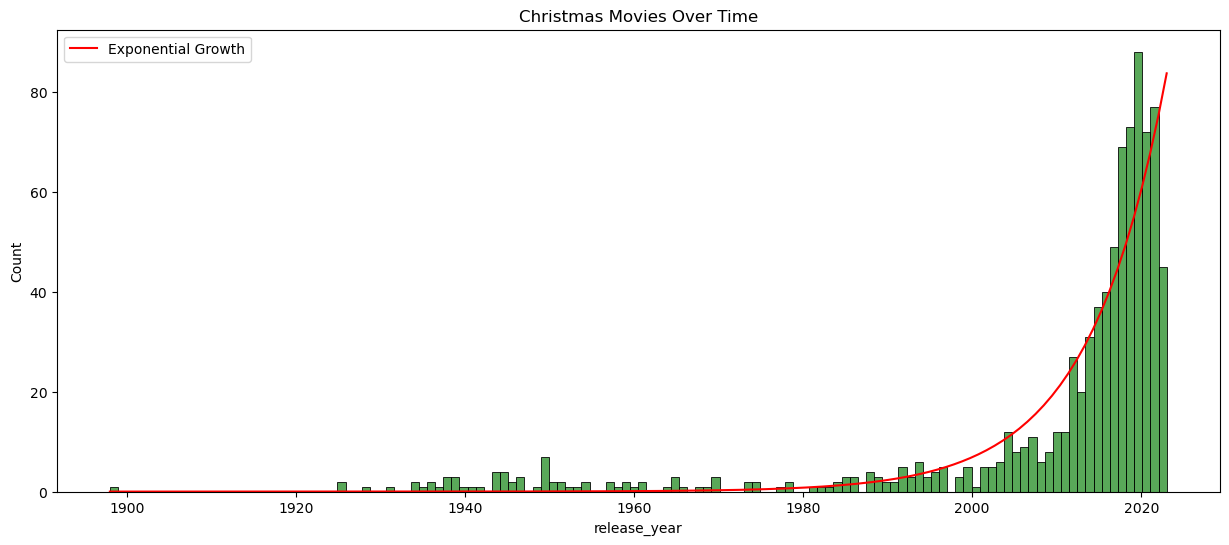

<Figure size 640x480 with 0 Axes>

In [58]:
#  Count the number of movies released each year
movies_per_year = xmas_movies['release_year'].value_counts().sort_index()
movies_per_year = movies_per_year.loc[1:]

# Define an exponential function for fitting
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# Prepare data for fitting (years and counts)
x_data = movies_per_year.index
y_data = movies_per_year.values

# Fit the exponential curve to the data
popt, pcov = curve_fit(exp_growth, x_data, y_data, p0=(1, 0.01), maxfev=5000)

# Plot the histogram
plt.figure(figsize=(15, 6))
sns.histplot(xmas_movies['release_year'].dropna(), bins=130, color='forestgreen')
plt.title('Christmas Movies Over Time')

#Plot the fitted exponential curve
x_range = np.linspace(min(x_data), max(x_data), 130)
plt.plot(x_range, exp_growth(x_range, *popt), color='red', label='Exponential Growth')
plt.legend()


plt.show()
plt.clf()

In [59]:
#Calculate exponential growth rate
growth_rate = popt[1]
print(f"Exponential Growth Rate: {growth_rate:.4f}")

Exponential Growth Rate: 0.1086


### Theatrical Releases vs TV / Streaming Platform Releases

The dataset includes both theatrical releases and movies released on television or streaming platforms. According to the data owner's guidelines, only theatrical releases have a reported `gross` amount, while television or streaming releases do not. It's worth noting that some older movies, which likely had theatrical releases, may not have reported gross amounts due to unavailable historical data. However, given the small volume of such cases, we will follow the data owner's instructions and categorize them accordingly.

Approximately **91%** of the movies were released on TV or a streaming platform while approximately **9%** of the movies were released in theaters.This distinction highlights the significant shift in distribution channels, with the majority of holiday movies opting for TV or digital platforms over theatrical releases.

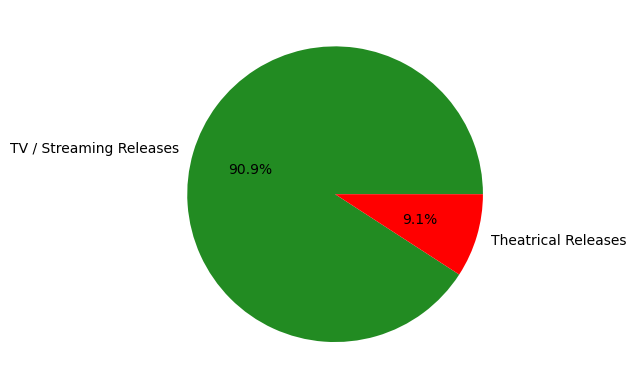

<Figure size 640x480 with 0 Axes>

In [62]:
#Determine which records have a gross amount
release_types = xmas_movies['gross'].isna().reset_index()

#Add a column to indicate if theatrical (has a gross amount) or TV Movie (does not have a gross amoutn)
release_types['release type'] = release_types.gross.apply(lambda x: 'TV' if x == False else 'Theater')

#Create a pie chart to indicate how many movies were released on TV vs Theater
plt.pie(release_types['release type'].value_counts(normalize=True), labels = ['TV / Streaming Releases','Theatrical Releases'],
       autopct = '%0.01f%%', colors = ['forestgreen','red'])
plt.show()
plt.clf()

### Genres in Christmas Movies

The top 10 genre combinations prominently feature **Comedy, Drama, Romance, Family, and Fantasy** in various combinations and align well with the Christmas theme. This trend aligns with the bar graph below, which shows _Comedy_ as the most popular genre, with nearly 500 movies categorized under it. _Romance_ follows closely with around 475 movies, and _Drama_ is third with approximately 450 movies. _Family_ is another common genre, represented in about 275 movies. _Fantasy_ appears in nearly 100 movies, followed by _Animation_ and _Adventure_, each around 50. All other genres have fewer than 50 movies, with _Documentary_ being the least popular. 

In [65]:
#Get a count of top 10 genre combinations
xmas_movies['genre'].value_counts().reset_index().head(10)

,genre,count
0,"Comedy, Drama, Romance",109
1,"Comedy, Romance",101
2,"Drama, Romance",90
3,"Comedy, Drama, Family",66
4,Romance,64
5,"Drama, Family, Romance",31
6,"Comedy, Family",25
7,Comedy,23
8,"Comedy, Family, Romance",20
9,"Comedy, Family, Fantasy",18


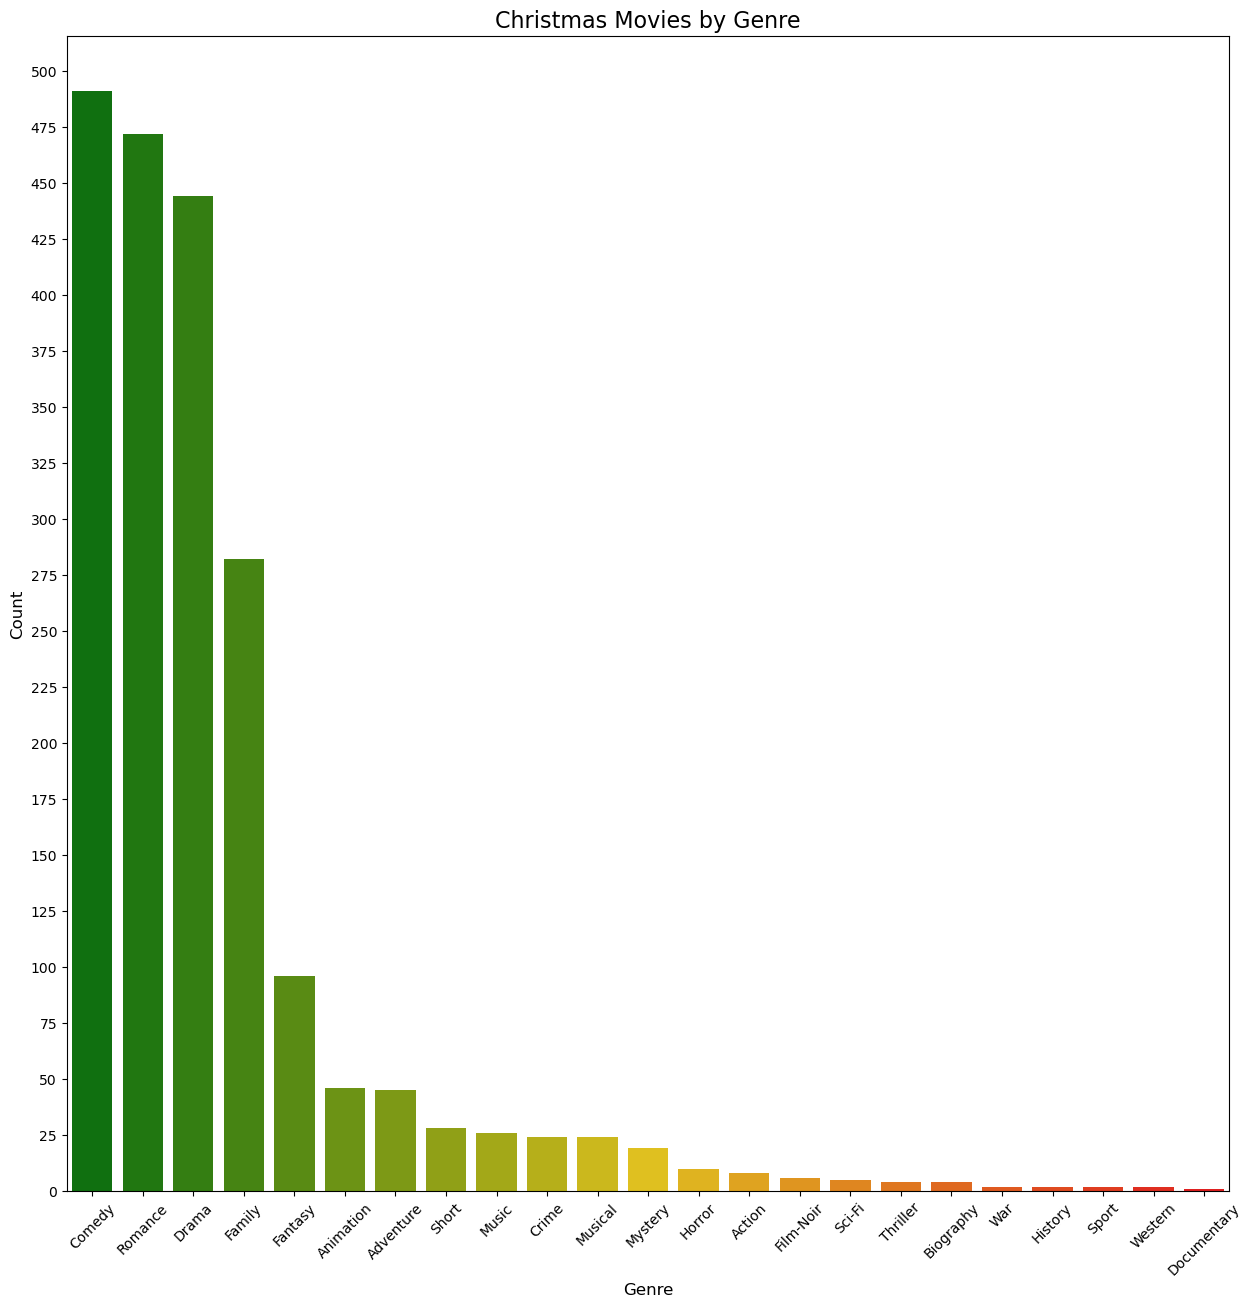

In [66]:
#Get a list of all the genre_combgenres
genre_list = []
for genre_comb in xmas_movies['genre'].str.split(',').dropna():
        for genre in genre_comb:
            genre_list.append(genre.strip())
            
#Convert list to a Dataframe with unique values and their counts.
genre_df = pd.DataFrame(genre_list,columns = ["genre"]).value_counts().reset_index()

# Create a Christmas-themed palette with colors corresponding to the number of unique ratings
christmas = sns.blend_palette(['#008000', '#FFD700','#FF0000' ], 23, as_cmap=False)

color_mapping = dict(zip(genre_df.genre, christmas))

# Create the countplot
plt.figure(figsize=(15, 15))
sns.barplot(x=genre_df['genre'],y=genre_df['count'],hue=genre_df['genre'],palette=color_mapping,legend=False)


# Add titles and labels
plt.title('Christmas Movies by Genre', fontsize=16)

plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yticks(np.arange(0, 501, 25))
plt.xticks(rotation=45)
plt.show()

### Christmas Movie Ratings

Most holiday movies are family-friendly and suitable for all audiences, with some requiring parental guidance. A notable number of Christmas movies have yet to be rated. The small number of movies rated "Approved" or "Passed" likely reflects holiday films produced before the late 1960s. Few movies are rated PG-13 or TV-14, which indicates that some movies might contain material that may not be appropriate for children under 13 or 14. While most Christmas movies avoid content meant for mature audiences, a small percentage are rated as mature. Less than 1% of Christmas films are specifically created for very young children.

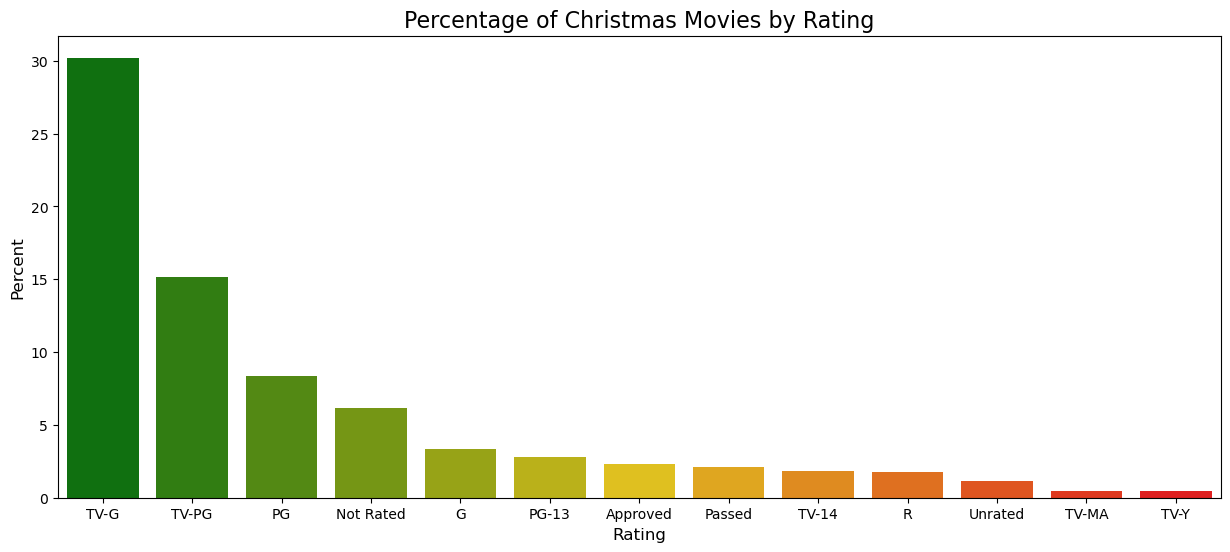

In [69]:
# Count values and sort them
rating_counts = xmas_movies['rating'].value_counts().sort_values(ascending=False)

# Create a Christmas-themed palette with colors corresponding to the number of unique ratings
christmas = sns.blend_palette(['#008000', '#FFD700','#FF0000' ], 13, as_cmap=False)

color_mapping = dict(zip(rating_counts.index, christmas))

# Create the countplot
plt.figure(figsize=(15, 6))
sns.countplot(x=xmas_movies['rating'],hue=xmas_movies['rating'], order=rating_counts.index,palette=color_mapping,legend=False,stat='percent')


# Add titles and labels
plt.title('Percentage of Christmas Movies by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Percent', fontsize=12)
plt.show()

### IMDB Ratings, Meta Scores and Votes

Before we begin our analysis, it is important to define the different movie-related terms that will be used:
- **IMDB rating** is the cumulative average of all users ratings. It represents the general audience’s enjoyment and perception of a movie. The number of **votes** impacts the movie's overall score; the larger the vote count, the more likely the rating represents broad audience sentiment.
- **Meta Scores** is the aggregated weighted score from critic reviews. Movies with a higher meta scores are often seen as having artistic or technical merit, even if they don't have mass appeal.

#### IMDB Ratings: Top 10 Christmas Movies

The highest rated film based on `imdb_rating`, with`meta_score` and `votes`  as secondary criteria, is **It's a Wonderful Life**. **A Kylie Christmas: Live from the Royal Albert Hall** also got a 8.6 rating on IMDB, but it lacked a `meta_score` and had significantly fewer `votes` compared to _It's a Wonderful Life_, which is why it ranks lower. 

All top-rated movies, except for _A Kylie Christmas: Live from the Royal Albert Hall_, fell within one or more of the top five genres. _A Kylie Christmas: Live from the Royal Albert Hall_ is classified solely under the _Music_ genre. Additional genres represented among the top 10 movies include _Animation_ and _Music_.

Four movies were either not rated or lacked an assigned rating category. All the other movies were suitable for all audiences, with one requiring parental guidance for children under 14. Additionally, only three movies released in the 21st century made it into the Top 10 list, while the others were made in the 19th century, specifically before 1990s.

In [74]:
#TOp 5 movies based on imdb_rating
xmas_movies.sort_values(by=['imdb_rating','meta_score','votes'], ascending=False).reset_index(drop=True).head(10)

,title,rating,runtime,imdb_rating,meta_score,genre,release_year,description,director,stars,votes,gross,img_src,type
0,It's a Wonderful Life,PG,130.0,8.6,89.0,"Drama, Family, Fantasy",1946.0,An angel is sent from Heaven to help a despera...,Frank Capra,"James Stewart, Donna Reed, Lionel Barrymore, T...",486479.0,NaN,https://m.media-amazon.com/images/M/MV5BZjc4ND...,Movie
1,A Kylie Christmas: Live from the Royal Albert ...,NaN,120.0,8.6,NaN,Music,2015.0,Add a Plot,Paul Dugdale,"Kylie Minogue, Dannii Minogue, Chrissie Hynde,...",52.0,NaN,https://m.media-amazon.com/images/M/MV5BNThkY2...,Movie
2,Anne of Green Gables,TV-G,199.0,8.5,NaN,"Drama, Family",1985.0,"An orphan girl, sent to an elderly brother and...",Megan Follows,"Colleen Dewhurst, Richard Farnsworth, Patricia...",22265.0,NaN,https://m.media-amazon.com/images/M/MV5BNjBmYj...,Movie
3,Jingle Vingle,NaN,96.0,8.5,NaN,Family,2022.0,Presenting India's First Christmas Themed Movi...,Mark Sujay Samuel,"Aashit Chatterjee, Vaishnavi Mahant, Matthew D...",129.0,NaN,https://m.media-amazon.com/images/M/MV5BNDJmNm...,Movie
4,Christmas Eve on Sesame Street,TV-Y,60.0,8.4,NaN,"Comedy, Family, Music",1978.0,Big Bird worries when Oscar tells him that if ...,Jon Stone,"Jim Henson, Frank Oz, Jerry Nelson, Richard Hu...",1066.0,NaN,https://m.media-amazon.com/images/M/MV5BMzVhNz...,Movie
5,The Original Christmas Classics,NaN,NaN,8.4,NaN,"Animation, Family",1965.0,Includes the original stories of Rudolph the R...,NaN,NaN,47.0,NaN,https://m.media-amazon.com/images/M/MV5BNjg5ZW...,Movie
6,The Apartment,Approved,125.0,8.3,94.0,"Comedy, Drama, Romance",1960.0,A Manhattan insurance clerk tries to rise in h...,Billy Wilder,"Jack Lemmon, Shirley MacLaine, Fred MacMurray,...",192532.0,$18.60M,https://m.media-amazon.com/images/M/MV5BNzkwOD...,Movie
7,How the Grinch Stole Christmas!,Not Rated,26.0,8.3,NaN,"Animation, Comedy, Family",1966.0,A grumpy hermit hatches a plan to steal Christ...,Chuck Jones,"Ben Washam, Boris Karloff, June Foray, Dal McK...",57368.0,NaN,https://m.media-amazon.com/images/M/MV5BODE3NT...,Movie
8,A Charlie Brown Christmas,TV-G,25.0,8.3,NaN,"Animation, Comedy, Drama",1965.0,Depressed at the commercialism he sees around ...,Bill Melendez,"Ann Altieri, Chris Doran, Sally Dryer, Bill Me...",42695.0,NaN,https://m.media-amazon.com/images/M/MV5BMzQ3M2...,Movie
9,Holiday Hideaway,TV-14,96.0,8.3,NaN,"Family, Romance",2022.0,Carly Stewart is the queen of holiday celebrat...,Cole Patterson,"Lamese Williams, Vivica A. Fox, Camille Winbus...",48.0,NaN,https://m.media-amazon.com/images/M/MV5BNzI1ND...,Movie


#### Meta Scores: Top 10 Christmas Movies

The highest critically rated film based on `meta_score`, with`imdb_rating` and `votes`  as secondary criteria, is **The Shop Around the Corner**. Interestingly, the top 10 movies with the highest critical ratings were all released in 1960 or earlier, except for the remakes of **Little Women**, which ranks 4th and 9th on the list. Both _Little Women_ (the 2019 remake) and _Love Affair_ share the same `meta_score`, but Little Women edges ahead due to its higher imdb_rating. Although _Little Women_ (the 2019 remake) has a higher `imdb_rating` than _Meet Me in St. Louis_, the latter ranks higher due to its superior critical score.

All top critically rated films fall within one or more of the five most popular genres, with additional genres including _Music_, _Mystery_, and _Crime_. Two of the movies are classified as "Not Rated", while all others are suitable for general audiences, with a few recommending parental guidance.

In [77]:
#TOp 5 movies based on meta_score
xmas_movies.sort_values(by=['meta_score','imdb_rating','votes'], ascending=False).reset_index(drop=True).head(10)

,title,rating,runtime,imdb_rating,meta_score,genre,release_year,description,director,stars,votes,gross,img_src,type
0,The Shop Around the Corner,Not Rated,99.0,8.0,96.0,"Comedy, Drama, Romance",1940.0,Two employees at a gift shop can barely stand ...,Ernst Lubitsch,"Margaret Sullavan, James Stewart, Frank Morgan...",37205.0,$0.20M,https://m.media-amazon.com/images/M/MV5BZDMxYm...,Movie
1,The Apartment,Approved,125.0,8.3,94.0,"Comedy, Drama, Romance",1960.0,A Manhattan insurance clerk tries to rise in h...,Billy Wilder,"Jack Lemmon, Shirley MacLaine, Fred MacMurray,...",192532.0,$18.60M,https://m.media-amazon.com/images/M/MV5BNzkwOD...,Movie
2,Meet Me in St. Louis,Passed,113.0,7.5,94.0,"Comedy, Drama, Family",1944.0,Young love and childish fears highlight a year...,Vincente Minnelli,"Judy Garland, Margaret O'Brien, Mary Astor, Lu...",26838.0,$7.57M,https://m.media-amazon.com/images/M/MV5BMzkwNz...,Movie
3,Little Women,PG,135.0,7.8,91.0,"Drama, Romance",2019.0,"Jo March reflects back and forth on her life, ...",Greta Gerwig,"Saoirse Ronan, Emma Watson, Florence Pugh, Eli...",234116.0,$108.10M,https://m.media-amazon.com/images/M/MV5BY2QzYT...,Movie
4,Love Affair,Approved,88.0,7.3,91.0,"Comedy, Drama, Romance",1939.0,A French playboy and an American former nightc...,Leo McCarey,"Irene Dunne, Charles Boyer, Maria Ouspenskaya,...",6198.0,NaN,https://m.media-amazon.com/images/M/MV5BZGE5Nm...,Movie
5,Going My Way,Passed,126.0,7.0,90.0,"Comedy, Drama, Music",1944.0,When young Father O'Malley arrives at St. Domi...,Leo McCarey,"Bing Crosby, Barry Fitzgerald, Frank McHugh, J...",13137.0,$16.30M,https://m.media-amazon.com/images/M/MV5BODU3MD...,Movie
6,It's a Wonderful Life,PG,130.0,8.6,89.0,"Drama, Family, Fantasy",1946.0,An angel is sent from Heaven to help a despera...,Frank Capra,"James Stewart, Donna Reed, Lionel Barrymore, T...",486479.0,NaN,https://m.media-amazon.com/images/M/MV5BZjc4ND...,Movie
7,Miracle on 34th Street,Not Rated,96.0,7.9,88.0,"Comedy, Drama, Family",1947.0,After a divorced New York mother hires a nice ...,George Seaton,"Edmund Gwenn, Maureen O'Hara, John Payne, Gene...",53189.0,$2.65M,https://m.media-amazon.com/images/M/MV5BNjRkOG...,Movie
8,Little Women,PG,115.0,7.3,87.0,"Drama, Family, Romance",1994.0,The March sisters live and grow in post-Civil ...,Gillian Armstrong,"Susan Sarandon, Winona Ryder, Kirsten Dunst, C...",62422.0,$50.08M,https://m.media-amazon.com/images/M/MV5BNzY2M2...,Movie
9,The Thin Man,TV-PG,91.0,7.9,86.0,"Comedy, Crime, Mystery",1934.0,Former detective Nick Charles and his wealthy ...,W.S. Van Dyke,"William Powell, Myrna Loy, Maureen O'Sullivan,...",32021.0,NaN,https://m.media-amazon.com/images/M/MV5BY2FlMD...,Movie


#### Votes: Top 10 Christmas Movies

The film with the most votes is **Die Hard**. Unlike many of the top-rated Christmas movies, most films on this list are more recent, except for **It's a Wonderful Life**. Many movies on this list, while considered American Christmas classics, received moderate to low meta scores despite their moderate to high IMDB ratings. This likely indicates that these films, while not always praised by critics, are widely enjoyed by general audiences for their entertainment value.

With only four films rated PG, three of the top four carrying an R rating, and the rest rated PG-13, these movies evidently appeal to more mature audiences. This list’s composition reveals a interesting pattern: while tagged as "Christmas movies," several films don’t strongly emphasize holiday themes, positioning them as choices for year-round viewing. This trend shows a more flexible audience interpretation of what constitutes a “Christmas movie.”

Furthermore, most movies on this list fall within one or more of the five most popular genres, with additional representation from _Action, Thriller, Crime and Animation_ genres. The mix of genres and lighter holiday themes likely broadens their appeal, offering holiday films with action or suspense that attract more viewers and votes.

In [80]:
#TOp 5 movies based on number of votes
xmas_movies.sort_values(by=['votes'], ascending=False).reset_index(drop=True).head(10)

,title,rating,runtime,imdb_rating,meta_score,genre,release_year,description,director,stars,votes,gross,img_src,type
0,Die Hard,R,132.0,8.2,72.0,"Action, Thriller",1988.0,A New York City police officer tries to save h...,John McTiernan,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",924658.0,$83.01M,https://m.media-amazon.com/images/M/MV5BZjRlND...,Movie
1,Silver Linings Playbook,R,122.0,7.7,81.0,"Comedy, Drama, Romance",2012.0,"After a stint in a mental institution, former ...",David O. Russell,"Bradley Cooper, Jennifer Lawrence, Robert De N...",734121.0,$132.09M,https://m.media-amazon.com/images/M/MV5BMTM2MT...,Movie
2,Home Alone,PG,103.0,7.7,63.0,"Comedy, Family",1990.0,"An eight-year-old troublemaker, mistakenly lef...",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",629713.0,$285.76M,https://m.media-amazon.com/images/M/MV5BMzFkM2...,Movie
3,Love Actually,R,135.0,7.6,55.0,"Comedy, Drama, Romance",2003.0,Follows the lives of eight very different coup...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",517283.0,$59.70M,https://m.media-amazon.com/images/M/MV5BNThkNj...,Movie
4,Edward Scissorhands,PG-13,105.0,7.9,74.0,"Drama, Fantasy, Romance",1990.0,The solitary life of an artificial man - who w...,Tim Burton,"Johnny Depp, Winona Ryder, Dianne Wiest, Antho...",515997.0,$56.36M,https://m.media-amazon.com/images/M/MV5BMWY2MG...,Movie
5,It's a Wonderful Life,PG,130.0,8.6,89.0,"Drama, Family, Fantasy",1946.0,An angel is sent from Heaven to help a despera...,Frank Capra,"James Stewart, Donna Reed, Lionel Barrymore, T...",486479.0,NaN,https://m.media-amazon.com/images/M/MV5BZjc4ND...,Movie
6,Home Alone 2: Lost in New York,PG,120.0,6.9,46.0,"Adventure, Comedy, Crime",1992.0,One year after Kevin McCallister was left home...,Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, Cath...",389541.0,$173.59M,https://m.media-amazon.com/images/M/MV5BNDI1Mz...,Movie
7,Shazam!,PG-13,132.0,7.0,71.0,"Action, Adventure, Comedy",2019.0,A newly fostered young boy in search of his mo...,David F. Sandberg,"Zachary Levi, Mark Strong, Asher Angel, Jack D...",377356.0,$140.37M,https://m.media-amazon.com/images/M/MV5BOWZhZj...,Movie
8,The Nightmare Before Christmas,PG,76.0,7.9,82.0,"Animation, Family, Fantasy",1993.0,"Jack Skellington, king of Halloween Town, disc...",Henry Selick,"Danny Elfman, Chris Sarandon, Catherine O'Hara...",368946.0,$75.08M,https://m.media-amazon.com/images/M/MV5BNWE4OT...,Movie
9,Batman Returns,PG-13,126.0,7.1,68.0,"Action, Crime, Fantasy",1992.0,While Batman deals with a deformed man calling...,Tim Burton,"Michael Keaton, Danny DeVito, Michelle Pfeiffe...",322680.0,$162.83M,https://m.media-amazon.com/images/M/MV5BOGZmYz...,Movie


#### Correlation between Meta Scores and IMDB ratings

The scatterplot below reveals a **strong positive** correlation between `imdb_rating` and `meta_score` with a correlation coefficient of **0.82**.  The p-value is well below the significance threshold of 0.05, indicating that this correlation is _statistically significant_.  In other words, as IMDB rating increases, the meta scores also tends to increase. A few outliers may influence the linear regression line, but the Spearman correlation coefficient provides a more robust measure, as it is less sensitive to outliers.

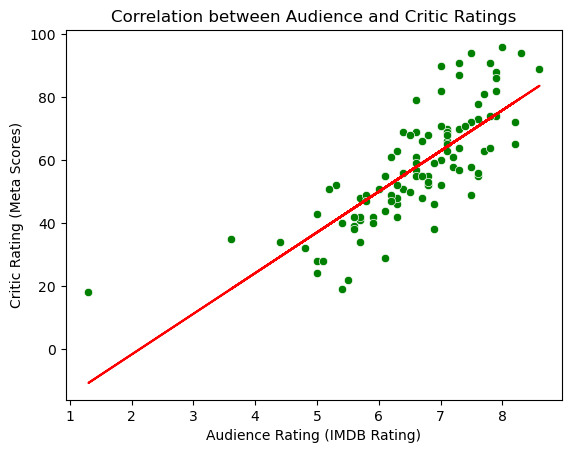

<Figure size 640x480 with 0 Axes>

In [83]:
# Drop rows with missing values in 'imdb_rating' or 'meta_score'
xmas_movies_clean = xmas_movies.dropna(subset=['imdb_rating', 'meta_score'])

#Scatter Function
scatter_correlation(xmas_movies_clean,'imdb_rating','meta_score')


plt.title("Correlation between Audience and Critic Ratings")
plt.ylabel("Critic Rating (Meta Scores)")
plt.xlabel("Audience Rating (IMDB Rating)")


plt.show()
plt.clf()

In [84]:
# Calculate the spearmanr correlation coefficient

correlation_coefficient, p_value = spearmanr(xmas_movies_clean.imdb_rating, xmas_movies_clean.meta_score)

print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
print(f'P-value: {p_value}')

Correlation Coefficient: 0.82
P-value: 8.83683768916452e-26


### Ratings vs Number of Votes

The spearman correlation coefficient of **0.42**, with an exceptionally low p-value (below 0.05), indicates a _statistically significant_, **moderately  strong positive** correlation between `imdb_rating` and the number of `votes`. This suggests that movies with higher IMDB ratings tend to receive more votes, reflecting a pattern where more popular, well-regarded Christmas movies engage a larger audience base.

With a correlation coefficient of **0.12** and a higher p-value (above 0.05), there’s a **very weak** and _statistically insignificant_ correlation between `meta_score` and the number of `votes`. This implies that critical acclaim (as measured by meta scores) has little to no relationship with the volume of audience engagement, suggesting that a high meta score does not necessarily drive a larger number of votes.

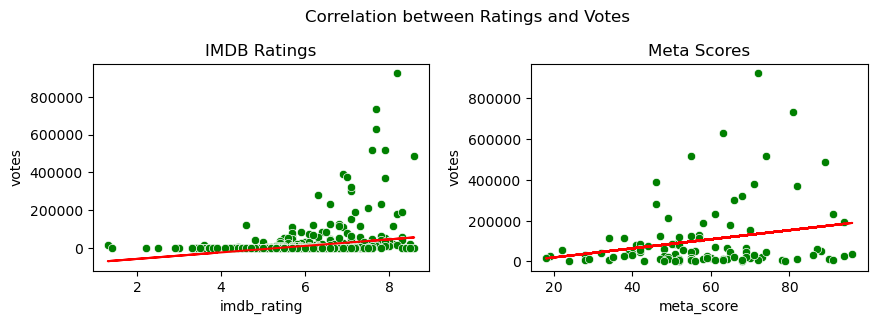

<Figure size 640x480 with 0 Axes>

In [87]:
#Figure size and title
plt.figure(figsize=(10,3))
plt.suptitle('Correlation between Ratings and Votes')

#IMDB ratings/votes correlation
plt.subplot(1,2,1)
# Drop rows with missing values in 'imdb_rating' or 'votes'
xmas_movies_clean = xmas_movies.dropna(subset=['imdb_rating', 'votes'])
xmas_movies_clean = xmas_movies_clean[xmas_movies_clean['votes'] != 0]

#Scatter Function
scatter_correlation(xmas_movies_clean,'imdb_rating','votes')

#title of subplot
plt.title("IMDB Ratings")

#meta scores/votes correlation
plt.subplot(1,2,2)
# Drop rows with missing values in 'votes' or 'meta_score'
xmas_movies_clean2 = xmas_movies.dropna(subset=['meta_score', 'votes'])
xmas_movies_clean2 = xmas_movies_clean2[xmas_movies_clean2['votes'] != 0]

#Scatter Function
scatter_correlation(xmas_movies_clean2,'meta_score','votes')

#title of subplot
plt.title("Meta Scores")


plt.subplots_adjust(wspace=0.3, top=0.8)

plt.show()
plt.clf()



In [88]:
# Calculate the spearmanr correlation coefficient 

correlation_coefficient, p_value = spearmanr(xmas_movies_clean.imdb_rating, xmas_movies_clean.votes)
print(f'Correlation Coefficient between IMDB Ratings and Votes: {correlation_coefficient:.2f}')
print(f'P-value: {p_value}')
print("\n")
correlation_coefficient, p_value = spearmanr(xmas_movies_clean2.meta_score, xmas_movies_clean2.votes)
print(f'Correlation Coefficient between Meta Scores and Votes: {correlation_coefficient:.2f}')
print(f'P-value: {p_value}')

Correlation Coefficient between IMDB Ratings and Votes: 0.42
P-value: 5.138237559937103e-37


Correlation Coefficient between Meta Scores and Votes: 0.12
P-value: 0.25223443375783716


### Ratings Over Time

Both the `imdb_rating` and `meta_score` show a **strong negative** correlation with `release_year`, as indicated by the coefficients of **-0.65** and **-0.66**, respectively. This suggests that as the release year of the movies increases (moving towards more recent years), both the audience ratings and critics ratings tend to decrease. The very low p-values (well below the common significance threshold of 0.05) indicate that these correlations are _statistically significant_. This means there is a high likelihood that the observed relationships are not due to random chance.

The results may suggest that newer Christmas movies tend to have lower ratings (both audience and critic ratings) compared to older films. This could be due to various factors, such as changing audience expectations, repetitive storylines, nostalgic appeal to classic movies, a saturated market for holiday films leading to increased competition, or differing critical standards over time.

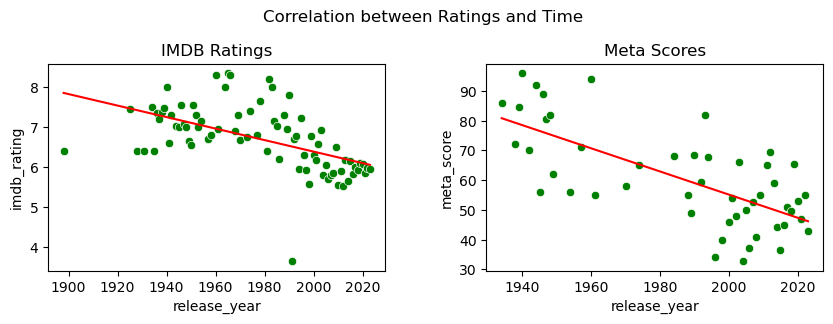

<Figure size 640x480 with 0 Axes>

In [91]:
#Figure size and title
plt.figure(figsize=(10,3))
plt.suptitle('Correlation between Ratings and Time')

#IMDB ratings/release year correlation
plt.subplot(1,2,1)
# Drop rows with missing values in 'imdb_rating' or 'release_year' and determine the average imdb_rating
xmas_movies_clean = xmas_movies.dropna(subset=['imdb_rating', 'release_year'])
xmas_movies_clean = xmas_movies_clean[xmas_movies_clean['release_year'] != 0]
xmas_movies_clean = xmas_movies_clean.groupby("release_year")["imdb_rating"].mean().reset_index()

#Scatter Function
scatter_correlation(xmas_movies_clean,'release_year','imdb_rating')

#title of subplot
plt.title("IMDB Ratings")

#meta scores/release year correlation
plt.subplot(1,2,2)
# Drop rows with missing values in 'meta_score' or 'release_year' and determine the average meta_score
xmas_movies_clean2 = xmas_movies.dropna(subset=['meta_score', 'release_year'])
xmas_movies_clean2 = xmas_movies_clean2[xmas_movies_clean2['release_year'] != 0]
xmas_movies_clean2 = xmas_movies_clean2.groupby("release_year")["meta_score"].mean().reset_index()

#Scatter Function
scatter_correlation(xmas_movies_clean2,'release_year','meta_score')

#title of subplot
plt.title("Meta Scores")

plt.subplots_adjust(wspace=0.3, top=0.8)
         
plt.show()
plt.clf()

In [92]:
# Calculate the spearmanr correlation coefficient

correlation_coefficient, p_value = spearmanr(xmas_movies_clean.imdb_rating, xmas_movies_clean.release_year)
print(f'Correlation Coefficient between IMDB Ratings and Time: {correlation_coefficient:.2f}')
print(f'P-value: {p_value}')
print("\n")
correlation_coefficient, p_value = spearmanr(xmas_movies_clean2.meta_score, xmas_movies_clean2.release_year)
print(f'Correlation Coefficient between Meta Scores and Time: {correlation_coefficient:.2f}')
print(f'P-value: {p_value}')

Correlation Coefficient between IMDB Ratings and Time: -0.65
P-value: 8.411632556850612e-11


Correlation Coefficient between Meta Scores and Time: -0.66
P-value: 2.6306788868888147e-07


### Movie Length and Ratings

The relationship between `imdb_rating` and `runtime` is **negligible**, with a spearman correlation coefficient of **0.04**. This relationship has a higher p-value than the significance threshold of 0.05 indicating that this relationship is _not statistically significant_. This implies that longer or shorter Christmas movies are not consistently rated higher or lower by audiences.

Conversely, the relationship between `meta_score` and `runtime` is **weak positive**, with a spearman correlation coefficient of **0.27**. The p-value here is below the 0.05 threshold, making this relationship _statistically significant_. This statistically significant result indicates that, to some extent, longer Christmas movies receive slightly higher critic ratings.

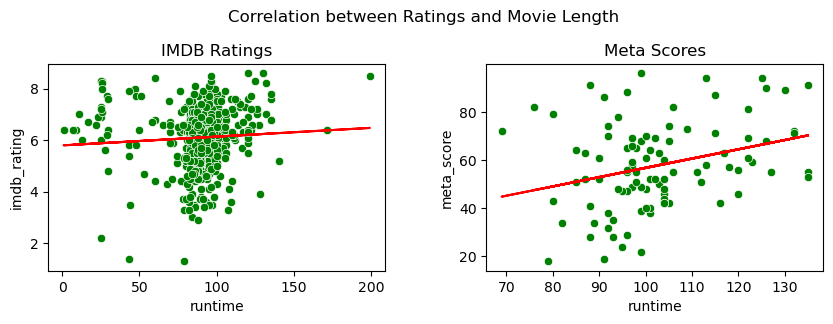

<Figure size 640x480 with 0 Axes>

In [95]:
#Figure size and title
plt.figure(figsize=(10,3))
plt.suptitle('Correlation between Ratings and Movie Length')

#IMDB ratings/votes correlation
plt.subplot(1,2,1)
# Drop rows with missing values in 'imdb_rating' or 'release_year' and determine the average imdb_rating
xmas_movies_clean = xmas_movies.dropna(subset=['imdb_rating', 'runtime'])
xmas_movies_clean = xmas_movies_clean[xmas_movies_clean['runtime'] != 0]

#Scatter Function
scatter_correlation(xmas_movies_clean,'runtime','imdb_rating')

#title of subplot
plt.title("IMDB Ratings")

#meta scores/votes correlation
plt.subplot(1,2,2)
# Drop rows with missing values in 'meta_score' or 'release_year' and determine the average meta_score
xmas_movies_clean2 = xmas_movies.dropna(subset=['meta_score', 'runtime'])
xmas_movies_clean2 = xmas_movies_clean2[xmas_movies_clean2['runtime'] != 0]

#Scatter Function
scatter_correlation(xmas_movies_clean2,'runtime','meta_score')

#title of subplot
plt.title("Meta Scores")

plt.subplots_adjust(wspace=0.3, top=0.8)
         
plt.show()
plt.clf()


In [96]:
correlation_coefficient, p_value = spearmanr(xmas_movies_clean.imdb_rating, xmas_movies_clean.runtime)
print(f'Correlation Coefficient between IMDB Ratings and Movie Length: {correlation_coefficient:.2f}')
print(f'P-value: {p_value}')
print("\n")
correlation_coefficient, p_value = spearmanr(xmas_movies_clean2.meta_score, xmas_movies_clean2.runtime)
print(f'Correlation Coefficient between Meta Scores and Movie Length: {correlation_coefficient:.2f}')
print(f'P-value: {p_value}')

Correlation Coefficient between IMDB Ratings and Movie Length: 0.04
P-value: 0.2753600119372839


Correlation Coefficient between Meta Scores and Movie Length: 0.27
P-value: 0.007261830621134435


## Conclusion

The findings provide insight into the characteristics of Christmas movies and how different factors correlate with their ratings and reception over time. 
* **How has the number of Christmas movies released each year changed over time?**
  * Christmas movies have grown exponentially over time, on average, by approximately 10.86% each year, with a dramatic increase after the 1990s.
* **What is the distribution of Christmas movie releases between theatrical and TV/streaming platforms?**
  * 91% of the movies in this dataset were released on TV or a streaming platform. In comparison, only about 9% of the movies were released in theaters.
* **Which genres are most popular among Christmas movies?**
  * Comedy, Drama, Romance, Family, and Fantasy are the top 5 genres in Christmas movies, followed by Animation and Adventure.
* **What are the common rating categories for Christmas movies?**
  * The majority of Christmas movies are suitable for all audiences, with parental guidance. Only a limited number of movies are rated for mature audiences.
* **Which Christmas movies have the highest IMDB ratings, meta scores, and vote counts, and is there a statistically significant relationship between these metrics?**
  * _It's a Wonderful Life_ is the highest audience-rated film, _A Shop Around the Corner_ is the highest critically rated film, and _Die Hard_ has the most votes.
  * IMDB ratings and meta scores have a strong positive statistically significant relationship.
  * IMDB ratings and the vote counts have a moderately strong and positive statistically significant relationship, while meta scores and the vote counts have a very weak and statistically insignificant relationship.
* **How do the ratings vary over time? Is there a correlation between the time of release and ratings?**
  * IMDB ratings and meta scores have a strong, negative, and statistically significant relationship with the release time. This relationship indicates that the ratings decrease over time.
* **Is there a correlation between the movie's length and ratings?**
  * There is a negligible and statistically insignificant relationship between the length of the movie and IMDB ratings, while there is a weak positive and statistically significant relationship between the length of the movie and meta scores.

## Further Analysis

Here are some things to consider for further analysis:
 - Explore whether the presence of well-known actors or directors in Christmas movies influences audience ratings and critical reception.
 - Currently, gross profit data is available only for theatrical releases, which may not represent the entire population of Christmas movies. Expanding profit data to include TV and streaming platforms could provide a more complete view.
 - Analyzing the month of release could reveal trends in how timing impacts reception and profits, especially around the holiday season.
 - Examining budget allocations over time may offer insights into production value trends and their impact on ratings and profitability.
 -  Investigate how ratings differ based on age groups or regions, potentially revealing specific audience segments that resonate with particular Christmas movies or themes.
